<a href="https://colab.research.google.com/github/SGopika1/Intern-DYNX-Task2/blob/main/Intern-DYNX-Task3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Saving students_data_dirty.csv to students_data_dirty.csv
✅ File loaded: students_data_dirty.csv

--- First 5 rows ---


,Hours_Studied,Attendance,Gender,Parent_Education,Exam_Score
0,8.93,63.0,Female,Highschool,88.83
1,6.23,86.0,NaN,NaN,44.34
2,8.94,63.0,NaN,NaN,41.55
3,7.23,91.0,NaN,Bachelors,38.74
4,7.53,69.0,Other,Masters,80.55



✅ Cleaning completed!


/tmp/ipython-input-3551626558.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[c].fillna(df[c].mean(), inplace=True)


,Hours_Studied,Attendance,Gender,Parent_Education,Exam_Score,Total,Average
0,8.93,63.0,Female,Highschool,88.83,160.76,53.586667
1,6.23,86.0,NaN,NaN,44.34,136.57,45.523333
2,8.94,63.0,NaN,NaN,41.55,113.49,37.830000
3,7.23,91.0,NaN,Bachelors,38.74,136.97,45.656667
4,7.53,69.0,Other,Masters,80.55,157.08,52.360000



--- Transformations & Reasons ---

✔ Trim spaces & normalize column names → Prevents hidden-space errors and keeps names consistent.
✔ Strip text fields → Avoids mismatches like 'Male ' vs 'Male'.
✔ Convert numeric-like columns → Ensures we can compute means, totals, and plots correctly.
✔ Fill missing numeric values → Preserves data by replacing NaNs with mean values.
✔ Drop empty/duplicate rows → Removes unnecessary or repeated entries.
✔ Create Total/Average → Summarizes student performance for analysis.


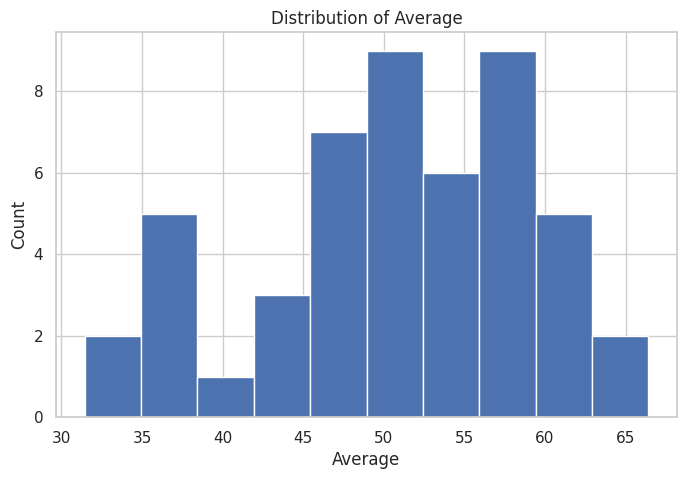

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>


✅ Cleaned file saved and ready for download.


In [1]:


# Step 1: Upload dataset
from google.colab import files
uploaded = files.upload()   # 👈 Upload students_data_dirty.csv

# Step 2: Import libraries and load data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

filename = list(uploaded.keys())[0]
df = pd.read_csv(filename)
print("✅ File loaded:", filename)
print("\n--- First 5 rows ---")
display(df.head())

# Step 3: Clean dataset
# ---------------------------------------

# 1️⃣ Trim spaces and normalize column names
df.columns = [c.strip().replace(" ", "_") for c in df.columns]

# 2️⃣ Remove extra spaces in text columns
for c in df.select_dtypes(include=['object']).columns:
    df[c] = df[c].astype(str).str.strip().replace({'nan': np.nan})

# 3️⃣ Convert numeric-like columns to numbers
possible_numeric = [c for c in df.columns if any(k in c.lower()
                    for k in ['hours','attendance','score','marks','total'])]
for c in possible_numeric:
    df[c] = pd.to_numeric(df[c].astype(str).str.replace('%','').str.replace(',',''),
                          errors='coerce')

# 4️⃣ Fill missing numeric values with column mean
for c in possible_numeric:
    df[c].fillna(df[c].mean(), inplace=True)

# 5️⃣ Drop completely empty rows & remove duplicates
df.dropna(how='all', inplace=True)
df.drop_duplicates(inplace=True)

# 6️⃣ Create Total and Average if multiple numeric columns exist
numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
if len(numeric_cols) >= 2:
    df["Total"] = df[numeric_cols].sum(axis=1)
    df["Average"] = df[numeric_cols].mean(axis=1)

print("\n✅ Cleaning completed!")
display(df.head())

# Step 4: Explain what and why
print("\n--- Transformations & Reasons ---\n")
explanations = {
    "Trim spaces & normalize column names": "Prevents hidden-space errors and keeps names consistent.",
    "Strip text fields": "Avoids mismatches like 'Male ' vs 'Male'.",
    "Convert numeric-like columns": "Ensures we can compute means, totals, and plots correctly.",
    "Fill missing numeric values": "Preserves data by replacing NaNs with mean values.",
    "Drop empty/duplicate rows": "Removes unnecessary or repeated entries.",
    "Create Total/Average": "Summarizes student performance for analysis."
}
for step, reason in explanations.items():
    print(f"✔ {step} → {reason}")

# Step 5: Basic visualization
sns.set(style="whitegrid")
col = "Average" if "Average" in df.columns else "Exam_Score"
plt.figure(figsize=(8,5))
plt.hist(df[col].dropna(), bins=10)
plt.title(f"Distribution of {col}")
plt.xlabel(col)
plt.ylabel("Count")
plt.show()

# Step 6: Save cleaned file
clean_name = "students_data_clean.csv"
df.to_csv(clean_name, index=False)
files.download(clean_name)
print("\n✅ Cleaned file saved and ready for download.")

